Hvor mange produkter kommer frem, 
når man søger på "breaking benjamin"
(se URL'en)?

In [8]:
import bs4
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import re


#browser = webdriver.Firefox()
#browser.get('http://www.krak.dk')

In [9]:
base_url = 'https://www.merchbar.com/search?q=breaking%20benjamin&p=1'
browser = webdriver.Firefox()

In [10]:
browser.get(base_url)
browser.implicitly_wait(1)


page_source = browser.page_source

soup = bs4.BeautifulSoup(page_source, 'html.parser')
event_cell = soup.find_all('div', {'class': 'd-none d-md-block col-md-3'})[0]
text = event_cell.select("span")[0].text
amount = re.compile(r'\d*')
mo = amount.search(text)
print("Amount of products:", mo.group(0))



Amount of products: 34


Hvor mange TRACKs er der i det første produkt, som ligger i kategorien CDs?

In [67]:
checkbox_label = browser.find_elements_by_class_name('ais-RefinementList-labelText')[2]
checkbox_label.click()
sleep(0.4)
first_item = browser.find_element_by_xpath('//div[@data-id="759745"]')
first_item.click()
sleep(0.4)
track_list = browser.find_element_by_class_name('track-list')
tracks = track_list.find_elements_by_class_name('track')
print(len(tracks))




13


Vis et bar chart der viser: 
- Procentdel af de viste produkter, der rent faktisk 
   indeholder Breaking Benjamin merch
- Procentdel af den merch, der er på tilbud
- Procentdel af den merch, der ikke er på lager

Percentage of BB merch:  53.57142857142857
Percentage of BB merch on sale:  93.33333333333333
Percentage of BB merch out of stock:  33.33333333333333


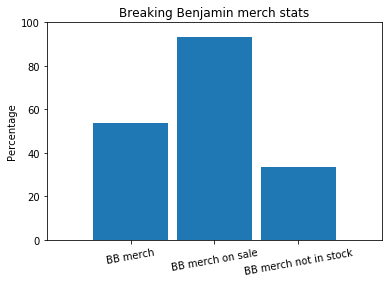

In [16]:

import matplotlib.pyplot as plt

def web_scroller():
    #Scroller source:
    #https://stackoverflow.com/questions/20986631/how-can-i-scroll-a-web-page-using-selenium-webdriver-in-python
    SCROLL_PAUSE_TIME = 0.5

    # Get scroll height
    last_height = browser.execute_script("return document.body.scrollHeight")

    while True:
        # Scroll down to bottom
        browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load page
        sleep(SCROLL_PAUSE_TIME)

        # Calculate new scroll height and compare with last scroll height
        new_height = browser.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height
    return True
done_scrolling = web_scroller()

amount_of_items = 0
bb_counter = 0
onsale_counter = 0
out_of_stock_counter = 0
if done_scrolling:
    merch_items = browser.find_elements_by_xpath('//div[@class="col-md-4 col-6"]')
    amount_of_items = len(merch_items)

    for item in merch_items:
        #On sale?
        sale_element = False
        #Actual Breaking Benjamin merch?
        name_element = item.find_element_by_class_name('MerchTile\.module__brandName')
        #In stock?
        stock_element = item.find_element_by_class_name('MerchTile\.module__status')

        #Checking the brand
        if name_element.text.upper() == "BREAKING BENJAMIN":
            bb_counter += 1
            try:
                #If we find a "ON SALE"-tag then the item is on sale
                #We only check for sales if the item is Breaking Benjamin merch
                item.find_element_by_class_name('MerchTile\.module__overlayCode')
                sale_element = True
            except:
                #Do nothing
                pass

            #Checking if item is on sale
            if sale_element:
                onsale_counter += 1
            
            #Checking availability
            if not stock_element.text.upper() == "IN STOCK":
                out_of_stock_counter += 1

# ----------------------------------------------------
# ----- Value number 1 needed for the bar chart: -----
# ----------------------------------------------------
percentage_of_bb = bb_counter/amount_of_items * 100

# ----------------------------------------------------
# ----- Value number 2 needed for the bar chart: -----
# ----------------------------------------------------
percentage_on_sale = onsale_counter/bb_counter * 100

# ----------------------------------------------------
# ----- Value number 2 needed for the bar chart: -----
# ----------------------------------------------------
percentage_out_of_stock = out_of_stock_counter/bb_counter * 100

print("Percentage of BB merch: ", percentage_of_bb)
print("Percentage of BB merch on sale: ", percentage_on_sale)
print("Percentage of BB merch out of stock: ", percentage_out_of_stock)

data = {"BB merch" : percentage_of_bb, "BB merch on sale" : percentage_on_sale,  "BB merch not in stock" : percentage_out_of_stock}

plt.bar(data.keys(), data.values(), width=0.9, align='center')

plt.axis([-1, len(data.values()), 0, 100])
plt.title("Breaking Benjamin merch stats", fontsize=12)
plt.ylabel("Percentage", fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=10)
plt.show()